# Ampa connections added
This notebook is just to show case the added AMPA connections

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib
import seaborn as sns

from network import BCPNNFast, NetworkManager
from data_transformer import build_ortogonal_patterns
from plotting_functions import plot_state_variables_vs_time, plot_network_activity, plot_network_activity_angle
from plotting_functions import  plot_adaptation_dynamics, plot_weight_matrix

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = 'fb59ef16c3bc6e8a68cefb6a902e39be87b3f41f'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Network parameters

In [3]:
# Patterns parameters
hypercolumns = 4
minicolumns = 15
n_patterns = 10  # Number of patterns

# Network parameters
tau_z_pre = 0.500
tau_z_post = 0.125
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_a = 2.7

# Manager properties
dt = 0.001
T_training = 1.0
T_ground = 0.25
T_recalling = 50
values_to_save = ['o', 'a', 'z_pre', 'z_post', 'p_pre', 'p_post', 'p_co', 'z_co', 'w',
                  'z_pre_ampa', 'z_post_ampa', 'p_pre_ampa', 'p_post_ampa', 'p_co_ampa', 'z_co_ampa', 'w_ampa']

repetitions = 3
resting_state = True
traces_to_plot = [0, 1, 2]

#### Patterns and network bulding

In [4]:
# Build patterns
patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:n_patterns]

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_post=tau_z_post, tau_z_pre=tau_z_pre,
               tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, T_training=T_training, T_ground=T_ground, T_recalling=T_recalling,
                         repetitions=repetitions, resting_state=resting_state, values_to_save=values_to_save)


In [5]:
manager.run_network_training(patterns)

('repetitions', 0)
('repetitions', 1)
('repetitions', 2)


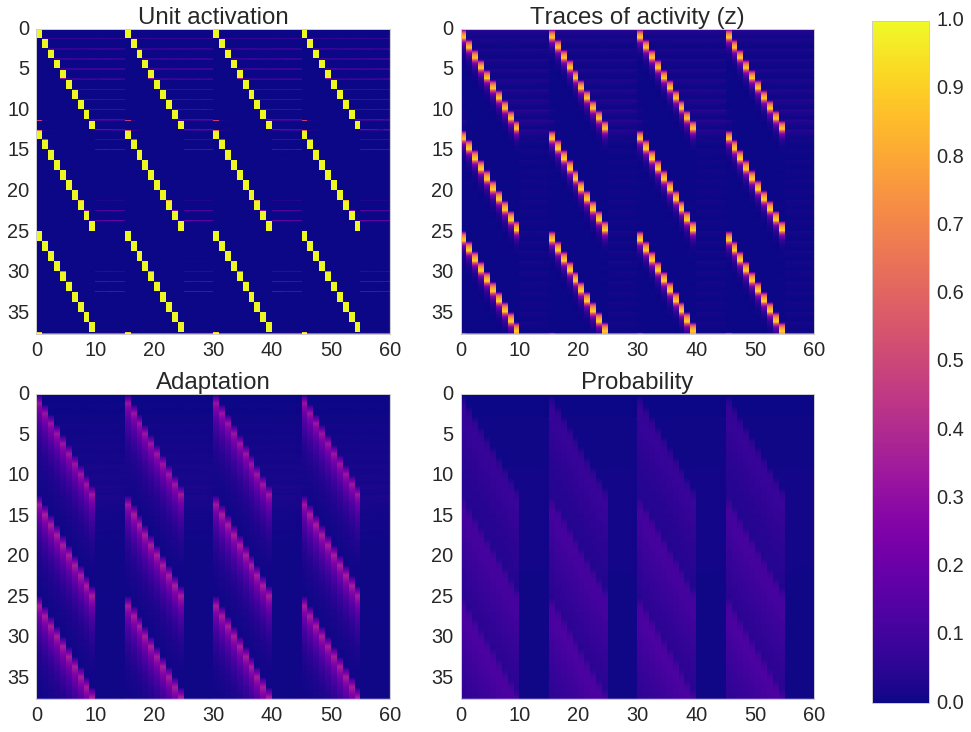

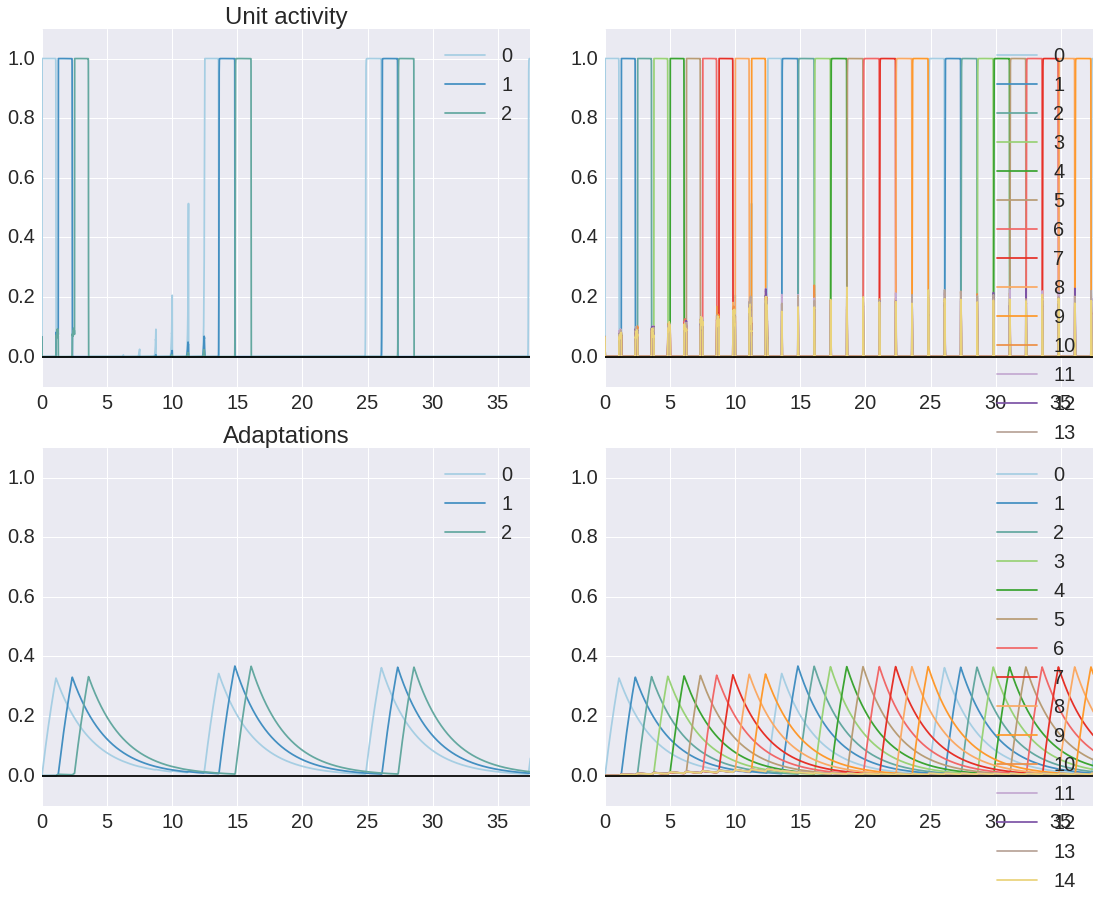

In [6]:
plot_network_activity(manager)
plot_adaptation_dynamics(manager, traces_to_plot)

We first plot the NMDA traces and connection matrix

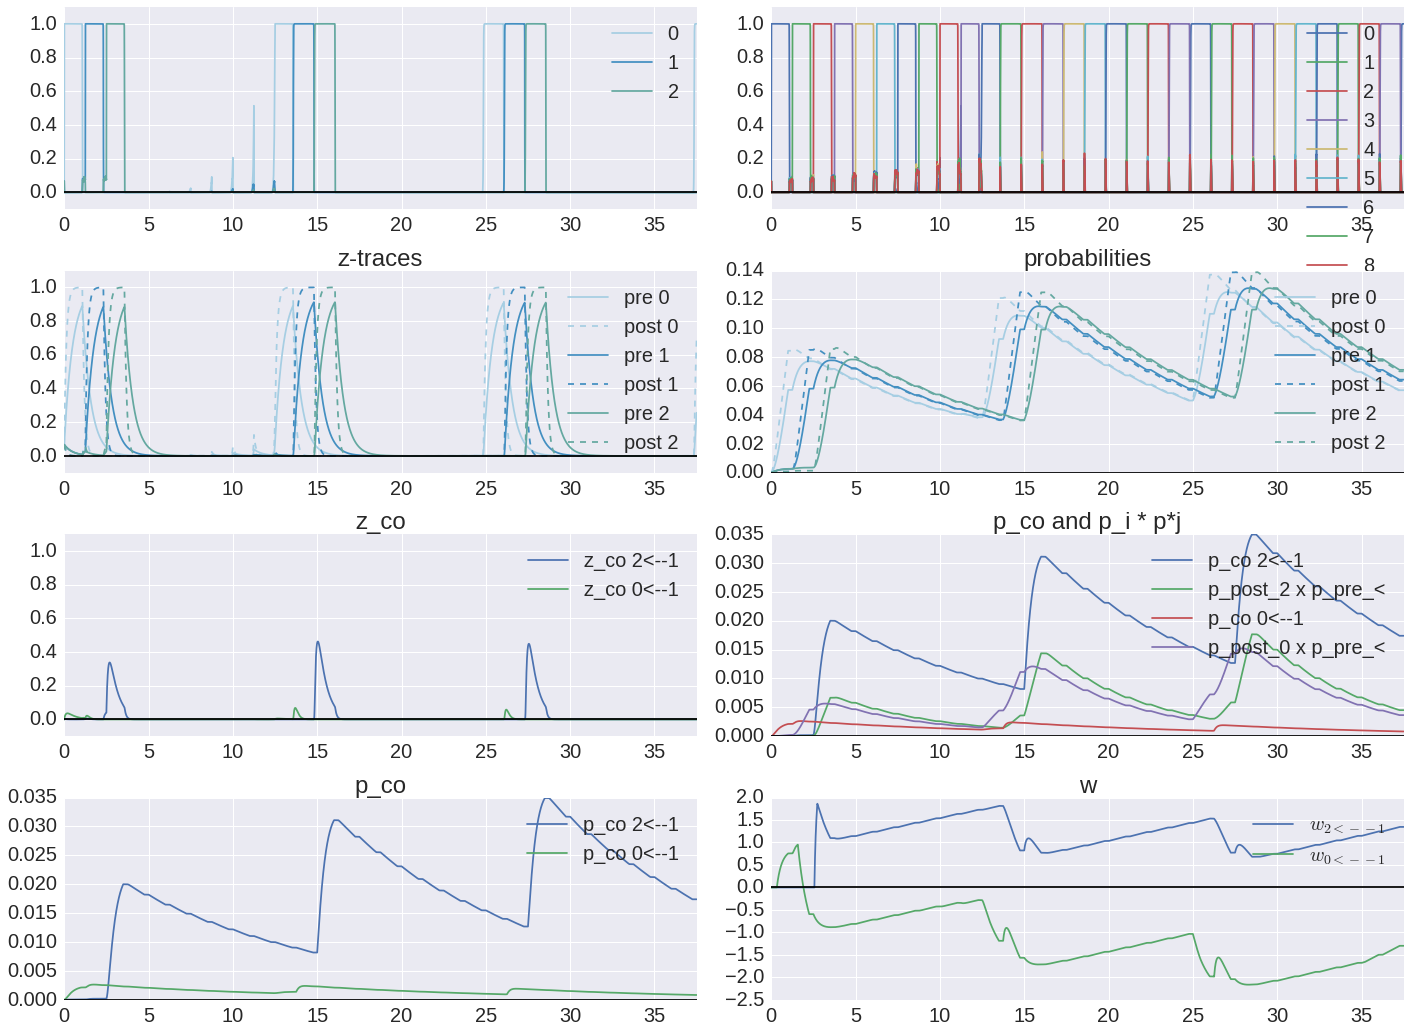

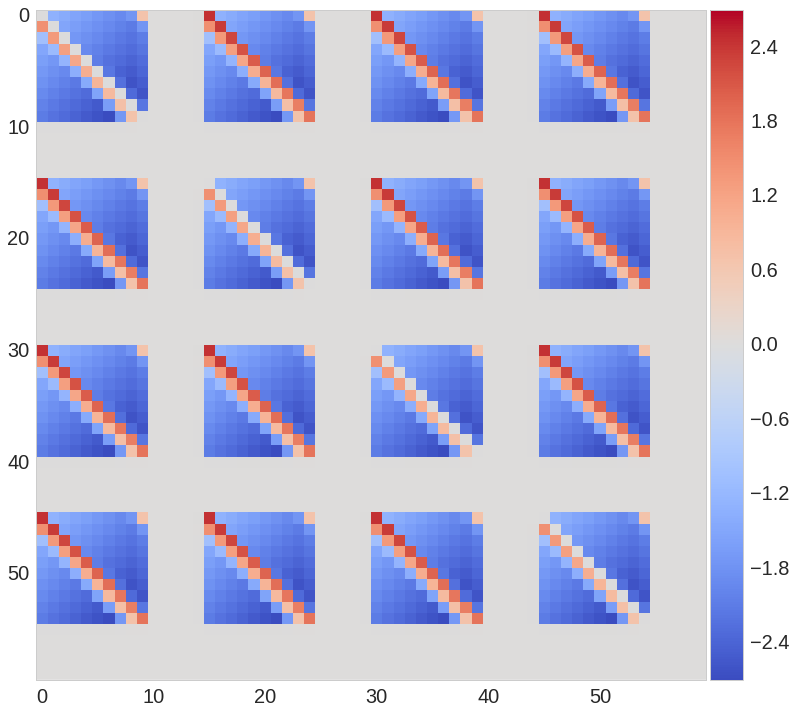

In [7]:
plot_state_variables_vs_time(manager, traces_to_plot, ampa=False)
plot_weight_matrix(nn, ampa=False)

Then we do the same for the AMPA traces and connection matrix

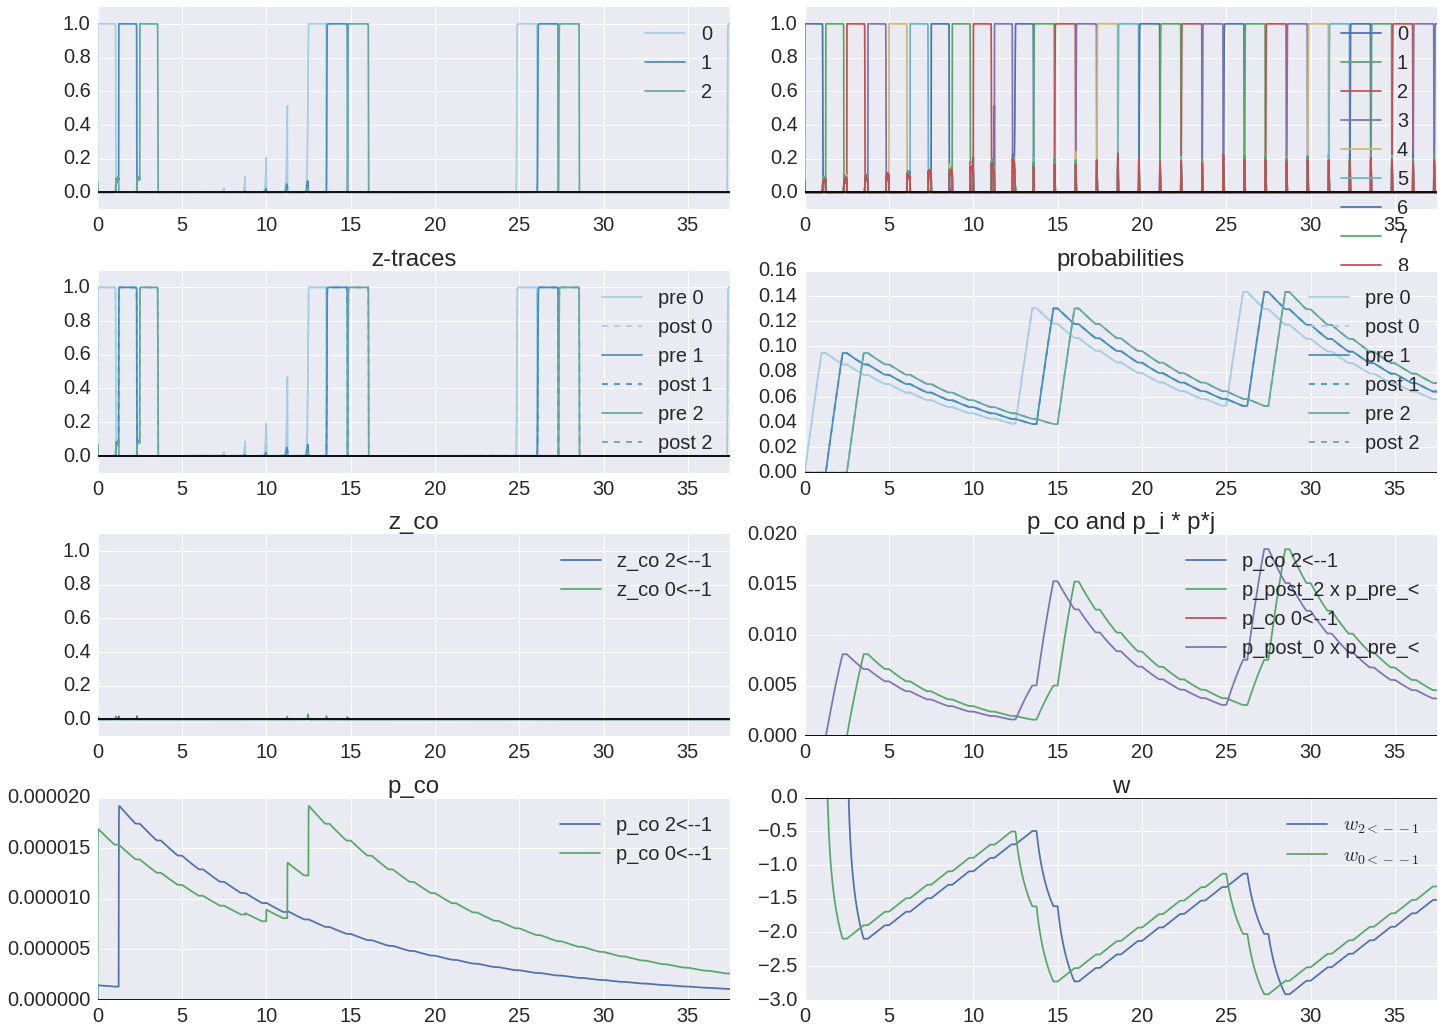

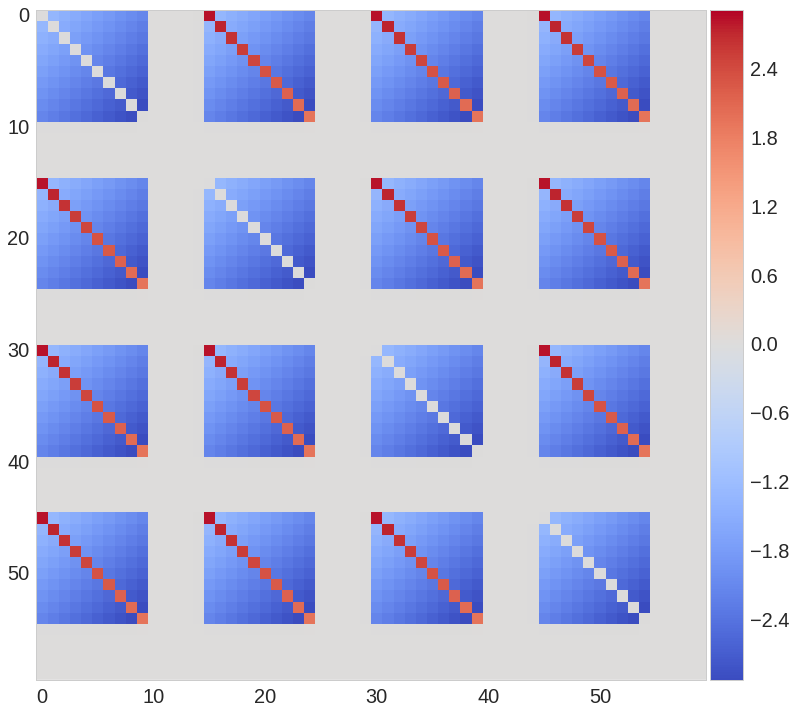

In [8]:
plot_state_variables_vs_time(manager, traces_to_plot, ampa=True)
plot_weight_matrix(nn, ampa=True)

##### Recall

First we run the recall with only AMPA connnections. We see that the patterns are learned, but not the connections among them.

In [9]:
manager.nn.g_w_ampa = 1.0
manager.nn.g_w = 0.0
manager.update_saving_dictionary(['o'])
manager.run_network_recall()

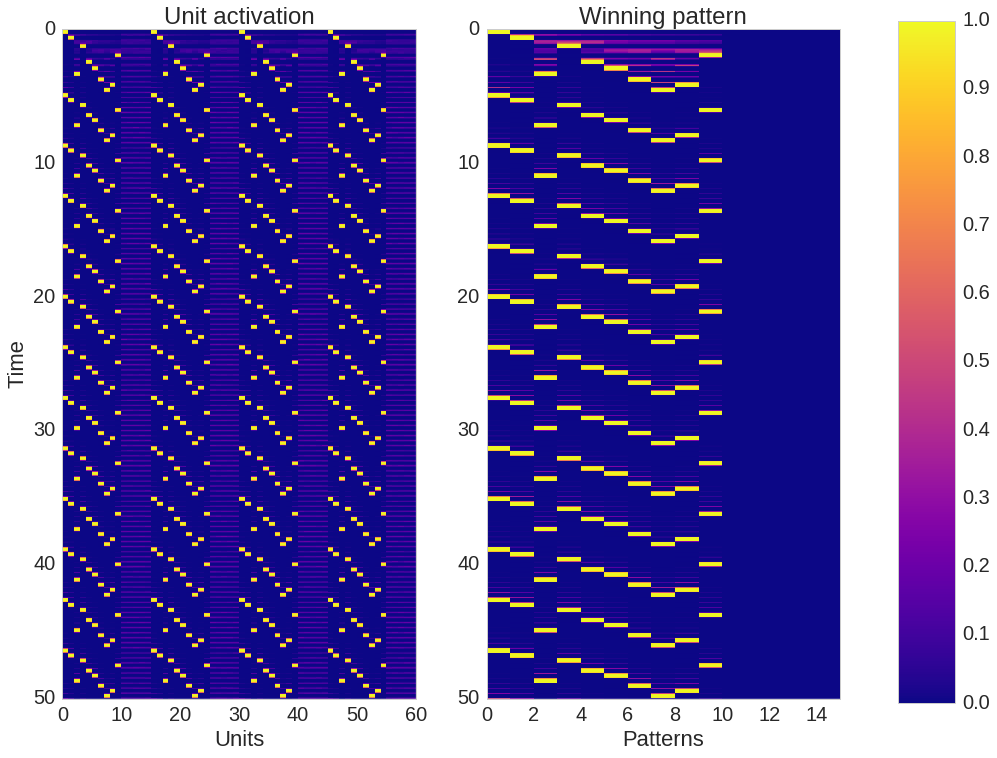

In [10]:
plot_network_activity_angle(manager)

Then we run the network with both AMPA and NMDA connections and we see that we get the sequence in the desired order

In [11]:
manager.nn.g_w_ampa = 1.0
manager.nn.g_w = 1.0
manager.update_saving_dictionary(['o'])
manager.run_network_recall()

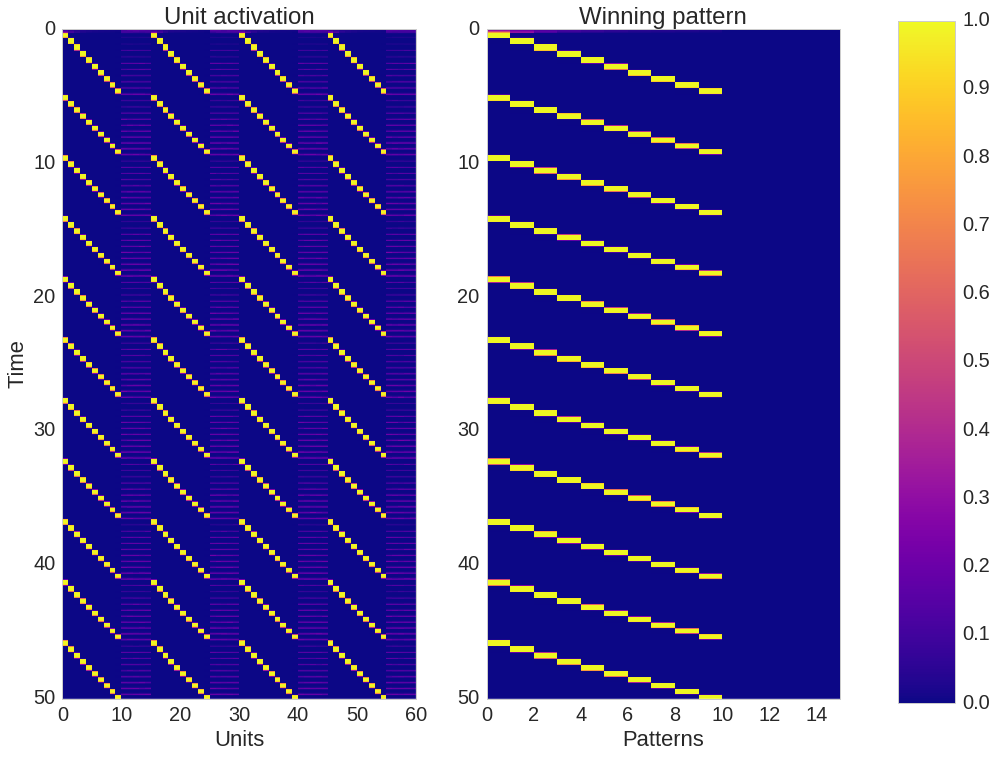

In [12]:
plot_network_activity_angle(manager)

#### Git reset

In [13]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])